In [36]:
import pandas as pd
import numpy as np
import folium
import datetime
from folium.plugins import MarkerCluster
import math
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("/Users/lukenash1/Documents/OrniStats/Public/Rare Bird Data - Main.xlsx", sheet_name = "Accepted Records")

LocationsRef = pd.read_excel("/Users/lukenash1/Documents/OrniStats/Public/Rare Bird Data - Main.xlsx", sheet_name = "Location Co-ordinates")
LocationsRef.set_index("site", inplace=True)

In [38]:
data = pd.read_excel("/Users/lukenash1/Documents/OrniStats/Public/Rare Bird Data - Main.xlsx", sheet_name = "Accepted Records")

LocationsRef = pd.read_excel("/Users/lukenash1/Documents/OrniStats/Public/Rare Bird Data - Main.xlsx", sheet_name = "Location Co-ordinates")
LocationsRef.set_index("site", inplace=True)

In [23]:
def mapRecords(qual):
    global LocationsRef
    speciesData = data[data['Qualifier'] == f'{qual}']
    relocationsData = speciesData[speciesData['Subset'].notna()]
    
    discDates = []
    deptDates = []
    markerLocations = {}
    markerLabels = {}
    relocDict = {}
    polygonDict = {}
    polygonPlot = []
    
    m = folium.Map(location = [55.00, -5.25], tiles = "Esri world_imagery", zoom_start = 5)
    cluster = MarkerCluster(color = "red").add_to(m)

    for i, date in speciesData["Date of Discovery"].items():
        if pd.notna(date) == True:
            datestr = date.strftime("%d/%m/%Y")
            discDates.append(datestr)
        else:
            speciesData.loc[i, "Month of Discovery"] = datestr
            discDates.append(datestr)
    
    for i, date in speciesData["Date of Departure"].items():
        if pd.notna(date) == True:
            datestr = date.strftime("%d/%m/%Y")
            deptDates.append(datestr)
        else:
            speciesData.loc[i, "Month of Departure"] = datestr
            deptDates.append(datestr)
    
    speciesData["Discovery Date String"] = discDates
    speciesData["Departure Date String"] = deptDates
    
    for i, value in speciesData["Helper"].items():
        site = speciesData.at[i, "Site"]
        inputLat = LocationsRef.at[site, 'lat']
        inputLong = LocationsRef.at[site, 'long']
        inputCoords = [inputLat, inputLong]
        markerLocations[value] = inputCoords
        area = speciesData.at[i, "Recording Area"]
        discDate = speciesData.at[i, "Discovery Date String"]
        deptDate = speciesData.at[i, "Departure Date String"]
        markerLabels[value] = f"{site}, {area}, {discDate} to {deptDate}"

        if "/" in speciesData.at[i, "Site"]:
            helperKey = speciesData.at[i, "Helper"]
            polygonList = site.split("/")
            polygonDict[helperKey] = polygonList
            
            for key, lst in polygonDict.items():
                polygonCoords = []
                for site in lst:
                    inpLat = LocationsRef.at[site, 'lat']
                    inpLong = LocationsRef.at[site, 'long']
                    inpCoords = [inpLat, inpLong]
                    polygonCoords.append(inpCoords)
                polygonPlot.append(polygonCoords)
    
    if len(relocationsData.index) != 0:
        for i, value in relocationsData["Record No."].items():
            site = speciesData.at[i, "Site"]
            inputLat = LocationsRef.at[site, 'lat']
            inputLong = LocationsRef.at[site, 'long']
            inputCoords = [inputLat, inputLong]
            if value not in relocDict:
                relocDict[value] = []
            relocDict[value].append(inputCoords)
    
    for key, item in markerLocations.items():
        folium.Marker(location = markerLocations[key], 
                      popup = markerLabels[key], 
                      icon = folium.Icon(color = "red", icon = "binoculars", prefix = "fa"),).add_to(cluster)
        
    for key, lst in relocDict.items():
        folium.PolyLine(locations = lst, line_cap = "round", color = "red").add_to(m)
    
    folium.Polygon(locations=polygonPlot, color="black", weight=5, fill_color="red", opacity=0.9, fill=True).add_to(m)
    return m

In [39]:
mapRecords("BRDSP")

/var/folders/k7/_w4lfpv55bd124vkvn691pmr0000gp/T/ipykernel_94428/2417109772.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speciesData["Discovery Date String"] = discDates
/var/folders/k7/_w4lfpv55bd124vkvn691pmr0000gp/T/ipykernel_94428/2417109772.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speciesData["Departure Date String"] = deptDates


In [84]:
amrobDates = pd.read_csv("/Users/lukenash1/Documents/OrniStats/Private/American Robin/AMROB Arrival Date by Location.csv")
amrobDates = amrobDates.dropna()
amrobDates

,discovery,lat,long
0,25/10/1952,51.177,-4.668
1,10/12/1954,52.616,-6.426
2,11/01/1955,52.255,-9.736
3,27/05/1961,58.958,-2.905
4,07/11/1962,51.177,-4.668
5,19/12/1963,49.893,-6.339
6,19/12/1963,49.893,-6.339
7,28/01/1965,51.769,-10.661
8,15/01/1966,50.670,-1.975
9,18/01/1966,50.701,-1.920


In [85]:
for i, value in amrobDates['discovery'].items():
    amrobDates.at[i, 'discovery']
    if pd.notna(value) == True:
        amrobDates.at[i, 'discovery'] = str(value)
        amrobDates.at[i, 'discovery'] = datetime.datetime.strptime(value, "%d/%m/%Y")
        if amrobDates.at[i, 'discovery'].month >= 9:
            amrobDates.at[i, 'discovery'] = amrobDates.at[i, 'discovery'].replace(year=2022)
        else:
            amrobDates.at[i, 'discovery'] = amrobDates.at[i, 'discovery'].replace(year=2023)
        diff = amrobDates.at[i, 'discovery'] - datetime.datetime(2022,9,1)
        amrobDates.at[i, 'discovery'] = diff.days
    else: continue

In [137]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()
amrobScaled = scaler.fit_transform(amrobDates)

(37, 3)

/Users/lukenash1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lukenash1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lukenash1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lukenash1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

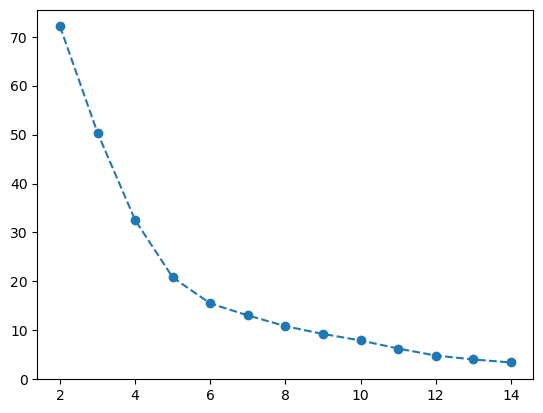

In [140]:
ssd = []

for k in range(2,15):
    model = KMeans(n_clusters = k)
    model.fit(amrobScaled)
    ssd.append(model.inertia_)

plt.plot(range(2,15), ssd, 'o--')

/Users/lukenash1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='long', ylabel='discovery'>

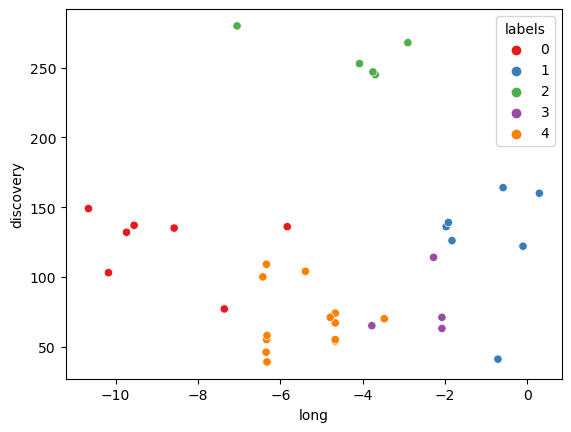

In [150]:
finalModel = KMeans(n_clusters=5)
labels = finalModel.fit_predict(amrobScaled)
amrobDates['labels'] = labels

<Axes: xlabel='discovery', ylabel='lat'>

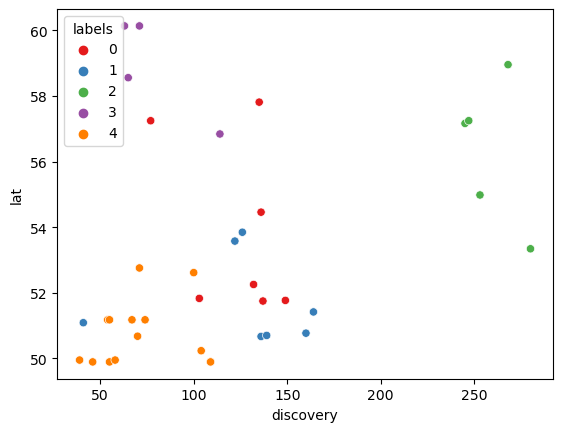

In [151]:
sns.scatterplot(data=amrobDates, x='discovery', y='lat', hue='labels', palette='Set1')

In [157]:
inputCoords = []
mapInput = {}

for i, value in amrobDates['lat'].items():
    inputLat = value
    inputLong = amrobDates.at[i, 'long']
    inputLabel = amrobDates.at[i, 'labels']
    inputLoc = [inputLat, inputLong]
    inputCoords.append(inputLoc)
    mapInput[tuple(inputLoc)] = inputLabel

In [186]:
m2 = folium.Map(location = [55.00, -5.25], tiles = "Esri world_imagery", zoom_start = 5)
cluster2 = MarkerCluster().add_to(m2)
colors = ["red", "orange", "green", "darkblue", "purple"]

In [187]:
for loc in inputCoords:
    color_code = int(mapInput[tuple(loc)])
    folium.Marker(location = loc, 
                  icon = folium.Icon(color = colors[color_code], icon = "binoculars", prefix = "fa"),).add_to(cluster2)

In [191]:
m2.save("/Users/lukenash1/Documents/OrniStats/Private/American Robin/AMROB Cluster Map.html")
amrobDates.to_csv("/Users/lukenash1/Documents/OrniStats/Private/American Robin/AMROB Cluster Table.csv")